### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# code to ignore warnings
import warnings
warnings.filterwarnings("ignore")

root_csv = '../csv files/'
root_pickle = '../pickle files/'

### Reading files

In [2]:
df_obese_total_pivot = pd.read_pickle(root_pickle +'Obesity_Total_Pivot.pkl')
df_obese_gender_pivot = pd.read_pickle(root_pickle +'Obesity_Gender_Pivot.pkl')
df_obese_age_pivot = pd.read_pickle(root_pickle +'Obesity_Age_Pivot.pkl')

### Reviewing data

In [3]:
df_obese_total_pivot.head(5)

,State,County,CountyFIPS,Year,Total Absolute,Total Percentage,Grocery Tax,Restaurant Tax,tax_delta,Population
0,Alabama,Autauga County,1001,2004,7213.0,21.9,0.04,0.04,0.0,32936.073633
6,Alabama,Autauga County,1001,2005,8093.0,24.0,0.04,0.04,0.0,33720.833333
12,Alabama,Autauga County,1001,2006,7457.0,21.5,0.04,0.04,0.0,34683.720930
18,Alabama,Autauga County,1001,2007,7467.0,21.1,0.04,0.04,0.0,35388.624953
24,Alabama,Autauga County,1001,2008,9568.0,26.6,0.04,0.04,0.0,35969.924296


In [4]:
df_obese_gender_pivot.head(5)

,State,County,CountyFIPS,Year,Gender Absolute,Gender Percentage,Gender,Grocery Tax,Restaurant Tax,tax_delta,Population
0,Alabama,Autauga County,1001,2004,3747.0,21.700001,Female,0.04,0.04,0.0,17267.280499
3,Alabama,Autauga County,1001,2004,3466.0,22.100000,Male,0.04,0.04,0.0,15683.257648
6,Alabama,Autauga County,1001,2005,4141.0,23.400000,Female,0.04,0.04,0.0,17696.581485
9,Alabama,Autauga County,1001,2005,3952.0,24.600000,Male,0.04,0.04,0.0,16065.040401
12,Alabama,Autauga County,1001,2006,3874.0,21.299999,Female,0.04,0.04,0.0,18187.794079


In [5]:
df_obese_age_pivot.head(5)

,State,County,CountyFIPS,Year,Age Obesity Absolute,Age Obesity Percentage,Age,Grocery Tax,Restaurant Tax,tax_delta,Population
0,Alabama,Autauga County,1001,2004,3411.0,20.700001,20-44,0.04,0.04,0.0,16478.260262
1,Alabama,Autauga County,1001,2004,2898.0,25.299999,45-64,0.04,0.04,0.0,11454.545800
2,Alabama,Autauga County,1001,2004,904.0,17.900000,65-beyond,0.04,0.04,0.0,5050.279437
6,Alabama,Autauga County,1001,2005,3714.0,22.200001,20-44,0.04,0.04,0.0,16729.729155
7,Alabama,Autauga County,1001,2005,3379.0,28.500000,45-64,0.04,0.04,0.0,11856.140351


### Regression Analysis at County level data

#### 1. Baseline without controls

##### a. With Total Percentage as Response Variable:

In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'Grocery Tax' and 'Restaurant Tax' are the features
X = df_obese_total_pivot['tax_delta']
y = df_obese_total_pivot['Total Percentage']

# Add a constant term to the features matrix (required for statsmodels)
X = sm.add_constant(X)

# Create and fit the linear regression model using statsmodels
stats_model = sm.OLS(y, X).fit()

# Print the summary
print(stats_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Total Percentage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     16.84
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           4.06e-05
Time:                        07:45:47   Log-Likelihood:            -1.6107e+05
No. Observations:               53352   AIC:                         3.221e+05
Df Residuals:                   53350   BIC:                         3.222e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.6421      0.040    635.780      0.0

##### Conclusions:
The baseline model with response as total percentage of Obesity and predictor variables grocery tax and restaurant tax:
- One percent increase in tax delta, keeping all other constant, decreases the percentage of Obesity by 3.51%
- p-value is close to 0 in both cases. Hence the coefficients of regression are statistically significant
- Adjusted R-square is 0.000 indicating that the model can explain only 0% of variation in total number of Obesity patient
- This model was fitted without taking into account affects of other factors such as age, gender, ethinicity etc.

#### 2. With single controls

##### a. Gender Control - On Percentage

In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# One Hot Encoding Gender in predictor variable
X = pd.get_dummies(df_obese_gender_pivot[['tax_delta', 'Gender']], columns=['Gender'], drop_first=True)
y = df_obese_gender_pivot['Gender Percentage']

# Add a constant term to the features matrix (required for statsmodels)
X = sm.add_constant(X)

# Create and fit the linear regression model using statsmodels
stats_model = sm.OLS(y, X).fit()

# Print the summary
print(stats_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Gender Percentage   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     518.9
Date:                Sun, 26 Nov 2023   Prob (F-statistic):          5.18e-225
Time:                        07:45:47   Log-Likelihood:            -3.2347e+05
No. Observations:              106702   AIC:                         6.469e+05
Df Residuals:                  106699   BIC:                         6.470e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          25.1350      0.033    768.481      

##### Conclusion:
The model with response as total number of Obesity and predictor variables grocery tax and restaurant tax and control on gender:
- One percent increase in tax delta, keeping all other constant, decreases the percentage by 3.85%
- If the gender is male, keeping all other constant, the percentage increases by 0.97%.
- p-value of all regression coefficients are statistically significant. 
- Adjusted R-square is 0.01 indicating that the model can explain only 1% of variation in total percentage of Obesity patient.

##### b. Age Control - On Percentage

In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# One Hot Encoding Gender in predictor variable
X = pd.get_dummies(df_obese_age_pivot[['tax_delta', 'Age']], columns=['Age'], drop_first=True)
y = df_obese_age_pivot['Age Obesity Percentage']

# Add a constant term to the features matrix (required for statsmodels)
X = sm.add_constant(X)

# Create and fit the linear regression model using statsmodels
stats_model = sm.OLS(y, X).fit()

# Print the summary
print(stats_model.summary())

                              OLS Regression Results                              
Dep. Variable:     Age Obesity Percentage   R-squared:                       0.273
Model:                                OLS   Adj. R-squared:                  0.273
Method:                     Least Squares   F-statistic:                 2.007e+04
Date:                    Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                            07:45:48   Log-Likelihood:            -4.8508e+05
No. Observations:                  159995   AIC:                         9.702e+05
Df Residuals:                      159991   BIC:                         9.702e+05
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const 

##### Conclusion:
The model with response as percentage of Obesity and predictor variables grocery tax and restaurant tax and control on age:
- One percent increase in tax delta, keeping all other constant, decreases the percentage by 2.42%
- If the age is between 45-64, keeping all other constant, the percentage increases by 5.63%.
- If the age is between 65-beyond, keeping all other constant, the percentage decreases by 1.51%.
- All p values are statistically significant
- Adjusted R-square is 0.273 indicating that the model can explain only 27.3% of variation in percentage of Obesity patient
- There is a significant increase in R-square. Since we fit linear model, we will have to validate its assumptions

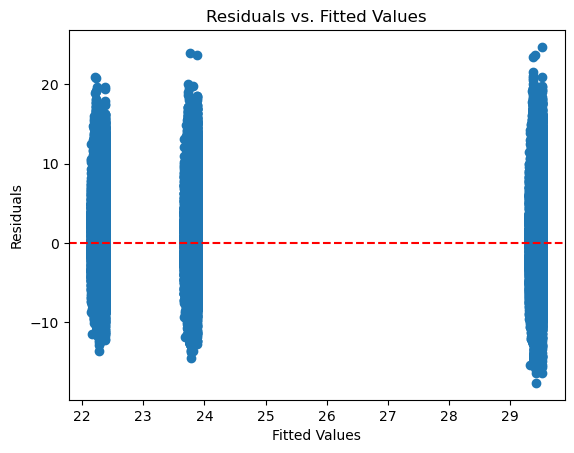

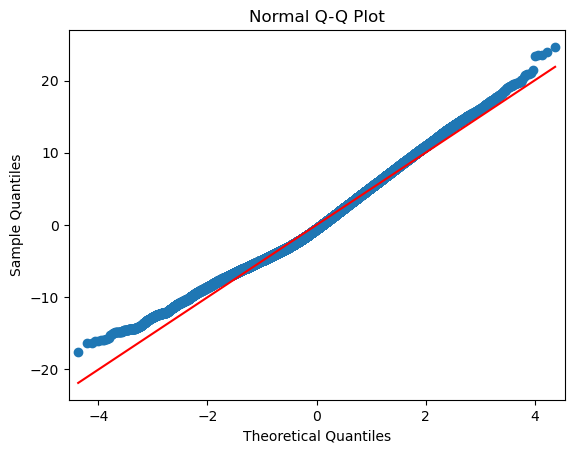

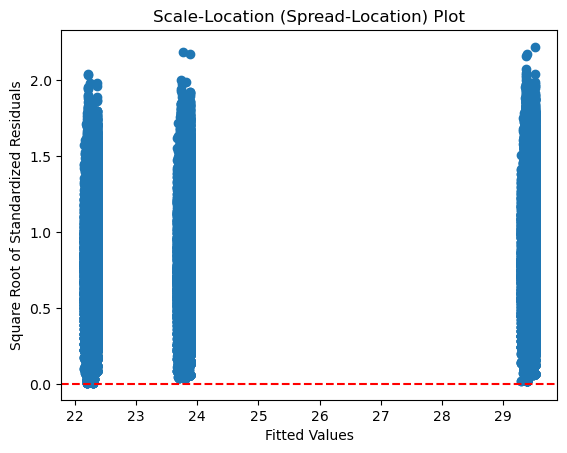

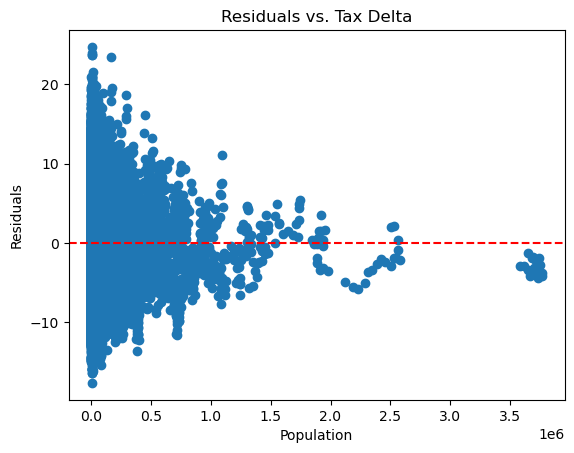

In [9]:
# Checking linearity assumptions

import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Assuming you have already fitted the linear regression model named 'model'

# Get fitted values and residuals
fitted_values = stats_model.fittedvalues
residuals = stats_model.resid

# 1. Residuals vs. Fitted Values Plot
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# 2. Normal Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q Plot')
plt.show()

# 3. Scale-Location (Spread-Location) Plot
sqrt_standardized_residuals = np.sqrt(np.abs(stats_model.get_influence().resid_studentized_internal))
plt.scatter(fitted_values, sqrt_standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Square Root of Standardized Residuals')
plt.title('Scale-Location (Spread-Location) Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# 4. Residuals vs. Predictor Plot for 'Grocery Tax'
plt.scatter(df_obese_age_pivot['Population'], residuals)
plt.xlabel('Population')
plt.ylabel('Residuals')
plt.title('Residuals vs. Tax Delta')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

##### Conclusions:
For the control model with age on response variable percentage Obesity, we observe that the assumptions are violated. Hence, we are applying transformation to provide remedy.

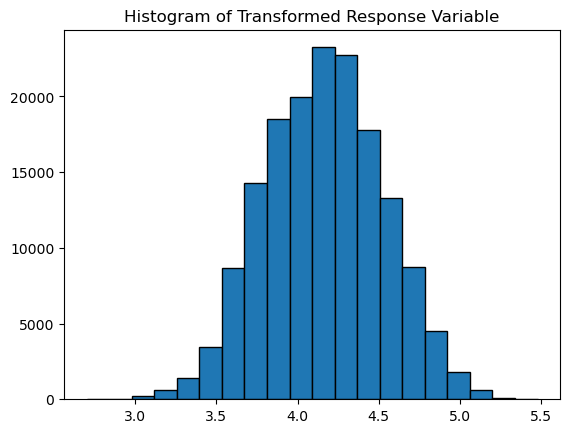

Lambda Value: 0.14805832959442175
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                 1.956e+04
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        07:45:53   Log-Likelihood:                -40297.
No. Observations:              159995   AIC:                         8.060e+04
Df Residuals:                  159991   BIC:                         8.064e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const       

In [10]:
#### Applying the Box-Cox transformation

# Apply Box-Cox Transformation to Response Variable
y_transformed, lambda_value = stats.boxcox(y + 1)  # Adding 1 to handle zero values

# Visualize the Transformed Response Variable
plt.hist(y_transformed, bins=20, edgecolor='black')
plt.title('Histogram of Transformed Response Variable')
plt.show()

# Check Lambda Value
print(f'Lambda Value: {lambda_value}')

# Fit a new model using the transformed response variable
stats_model_transformed = sm.OLS(y_transformed, X).fit()

# Print the summary of the transformed model
print(stats_model_transformed.summary())

##### Conclusions:
- The lambda value of transformation is 0.14
- For this lambda value, the model response variable (y) = % Obesity is now transformed to (((y^0.14)-1)/0.14) or (((% Obesity^0.14)-1)/0.14)
- This changes some of the inferences.
##### New Inferences:
- A one unit increase in restaurant tax decreases transformed y by 0.21%
- If the age bucket is 45-65, there is an increase in transformed y by 0.33%
- If the age bucket is 65-beyond, there is an decreases in transformed y by 0.10%
- Adj R-square is 26.8% indicating the model explains 26.8% variability in transformed y.

##### c. Total Population Control - On Percentage

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'Grocery Tax' and 'Restaurant Tax' are the features
X = df_obese_total_pivot[['tax_delta','Population']]
y = df_obese_total_pivot['Total Percentage']

# Add a constant term to the features matrix (required for statsmodels)
X = sm.add_constant(X)

# Create and fit the linear regression model using statsmodels
stats_model = sm.OLS(y, X).fit()

# Print the summary
print(stats_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Total Percentage   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     43.36
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           1.53e-19
Time:                        07:45:53   Log-Likelihood:            -1.6103e+05
No. Observations:               53352   AIC:                         3.221e+05
Df Residuals:                   53349   BIC:                         3.221e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.6220      0.040    634.560      0.0

##### Conclusion:
The model with response as % of Obesity and predictor variable tax and control on population:
- One percent increase in tax delta, keeping all other constant, decreases the Obesity % by 4.42. 
- One unit increase in population, keeping all other constant, decreases the Obesity % by 7.689 x 10^-7. 
- All p-value are statistically significant
- Adjusted R-square is 0.002 indicating that the model can explain only 0.2% of variation in total % of Obesity patient
- The conditional number is large and hence we need to check for multicollinearity
- We need to validate the linearity assumptions and if any is violated, apply necessary transformation.

In [12]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Check the VIF values
print(vif_data)

     Variable       VIF
0       const  3.549989
1   tax_delta  1.016110
2  Population  1.016110


##### Inference:
The VIF for predictor variables is small and hence multicollinearity does not exist

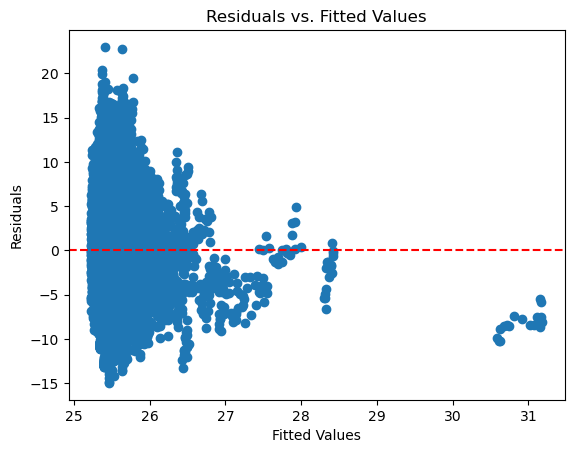

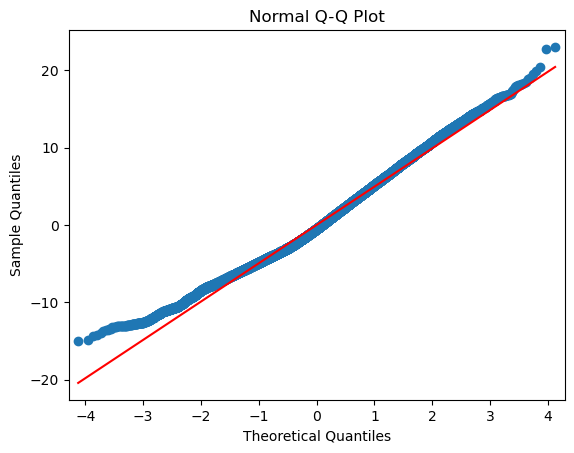

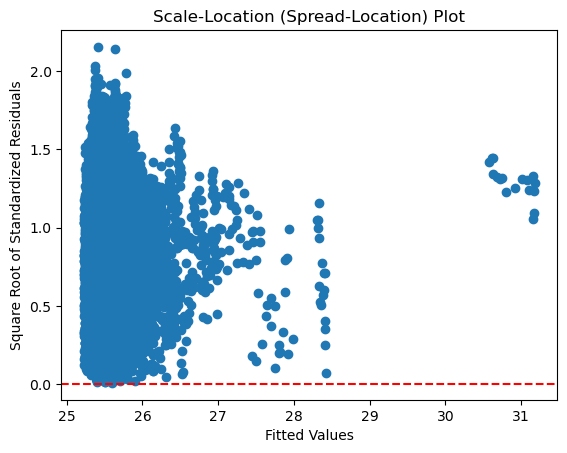

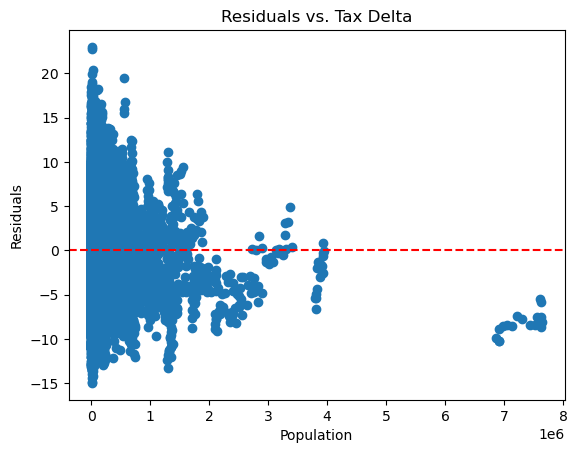

In [13]:
# Validating for linearity assumptions 

import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Assuming you have already fitted the linear regression model named 'model'

# Get fitted values and residuals
fitted_values = stats_model.fittedvalues
residuals = stats_model.resid

# 1. Residuals vs. Fitted Values Plot
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# 2. Normal Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q Plot')
plt.show()

# 3. Scale-Location (Spread-Location) Plot
sqrt_standardized_residuals = np.sqrt(np.abs(stats_model.get_influence().resid_studentized_internal))
plt.scatter(fitted_values, sqrt_standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Square Root of Standardized Residuals')
plt.title('Scale-Location (Spread-Location) Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# 4. Residuals vs. Predictor Plot for ''
plt.scatter(df_obese_total_pivot['Population'], residuals)
plt.xlabel('Population')
plt.ylabel('Residuals')
plt.title('Residuals vs. Tax Delta')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

##### Since the above model violates linearity assumptions, applying Box-Cox transformation

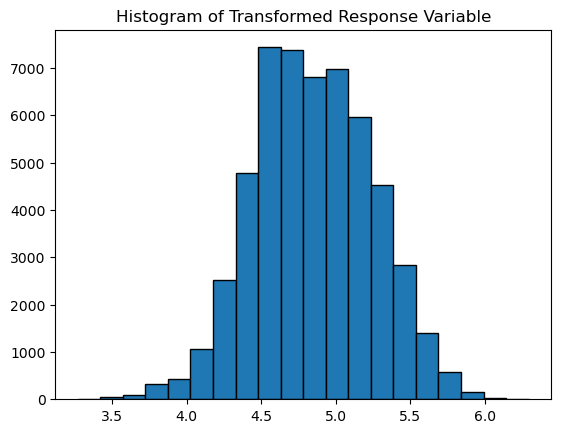

Lambda Value: 0.22847486523614613
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     56.57
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           2.88e-25
Time:                        07:45:56   Log-Likelihood:                -26079.
No. Observations:               53352   AIC:                         5.216e+04
Df Residuals:                   53349   BIC:                         5.219e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8

In [14]:
# Applying the Box-Cox transformation

# Apply Box-Cox Transformation to Response Variable
y_transformed, lambda_value = stats.boxcox(y + 1)  # Adding 1 to handle zero values

# Visualize the Transformed Response Variable
plt.hist(y_transformed, bins=20, edgecolor='black')
plt.title('Histogram of Transformed Response Variable')
plt.show()

# Check Lambda Value
print(f'Lambda Value: {lambda_value}')

# Fit a new model using the transformed response variable
stats_model_transformed = sm.OLS(y_transformed, X).fit()

# Print the summary of the transformed model
print(stats_model_transformed.summary())

##### Since, we do not get a good R-square value, even after fixing assumtpions by transforming, we drop further investigation.

#### 3. With multiple controls

##### a. Total Population and Gender - On Percentage

In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'Grocery Tax' and 'Restaurant Tax' are the features
X = pd.get_dummies(df_obese_gender_pivot[['tax_delta','Population', 'Gender']], columns=['Gender'], drop_first=True)
y = df_obese_gender_pivot['Gender Percentage']

# Add a constant term to the features matrix (required for statsmodels)
X = sm.add_constant(X)

# Create and fit the linear regression model using statsmodels
stats_model = sm.OLS(y, X).fit()

# Print the summary
print(stats_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Gender Percentage   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     397.3
Date:                Sun, 26 Nov 2023   Prob (F-statistic):          1.21e-256
Time:                        07:45:56   Log-Likelihood:            -3.2339e+05
No. Observations:              106702   AIC:                         6.468e+05
Df Residuals:                  106698   BIC:                         6.468e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          25.1121      0.033    767.096      

##### Conclusion:
The model with response as % of Obesity and predictor variable tax delta and control on gender and population:
- One percent increase in tax delta, keeping all other constant, decreases the Obesity % by 4.48%. 
- One unit increase in population, keeping all other constant, increases the Obesity number by 1.622 x 10^-7 
- Adjusted R-square is 0.011 indicating that the model can explain only 1.1% of variation in Obesity %
- The conditional number is large and hence we need to check for multicollinearity

In [16]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Check the VIF values
print(vif_data)

      Variable       VIF
0        const  4.552037
1    tax_delta  1.016073
2   Population  1.016145
3  Gender_Male  1.000071


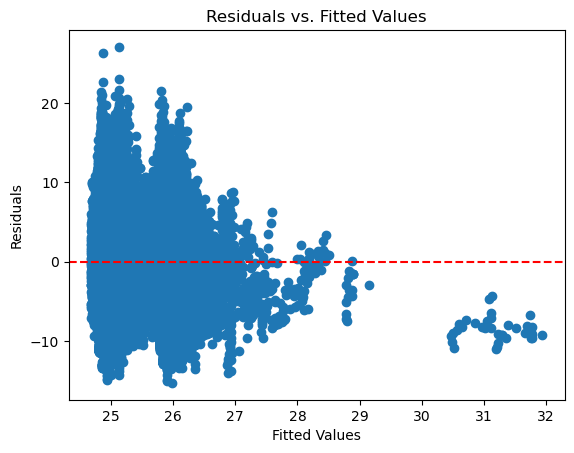

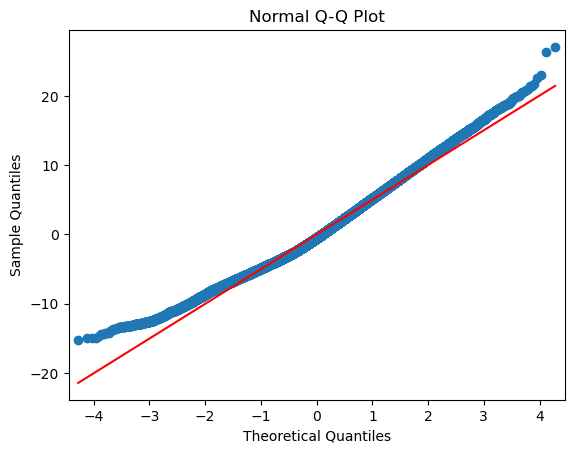

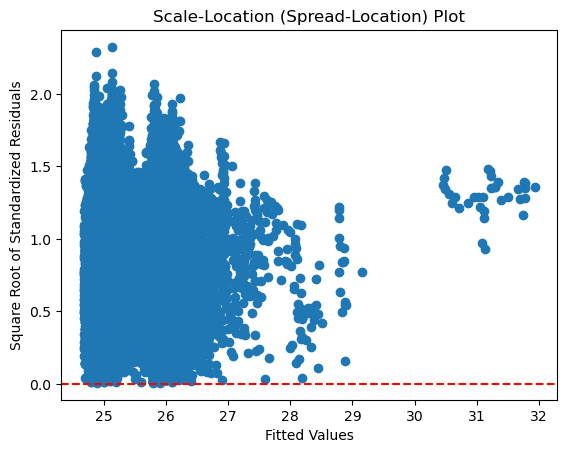

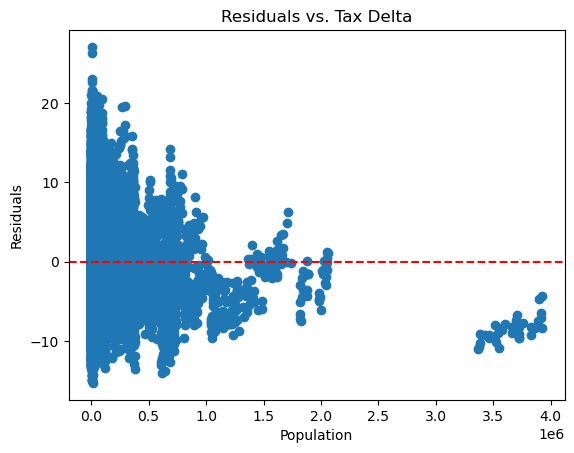

In [17]:
# Validating for linearity assumptions 

import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Assuming you have already fitted the linear regression model named 'model'

# Get fitted values and residuals
fitted_values = stats_model.fittedvalues
residuals = stats_model.resid

# 1. Residuals vs. Fitted Values Plot
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# 2. Normal Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q Plot')
plt.show()

# 3. Scale-Location (Spread-Location) Plot
sqrt_standardized_residuals = np.sqrt(np.abs(stats_model.get_influence().resid_studentized_internal))
plt.scatter(fitted_values, sqrt_standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Square Root of Standardized Residuals')
plt.title('Scale-Location (Spread-Location) Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# 4. Residuals vs. Predictor Plot for ''
plt.scatter(df_obese_gender_pivot['Population'], residuals)
plt.xlabel('Population')
plt.ylabel('Residuals')
plt.title('Residuals vs. Tax Delta')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

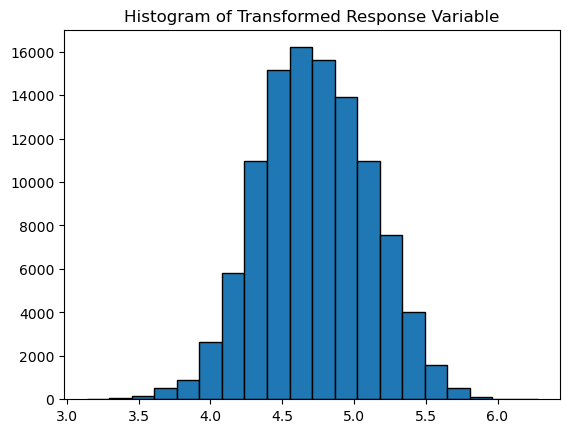

Lambda Value: 0.21498812940831752
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     450.7
Date:                Sun, 26 Nov 2023   Prob (F-statistic):          5.01e-291
Time:                        07:46:00   Log-Likelihood:                -48772.
No. Observations:              106702   AIC:                         9.755e+04
Df Residuals:                  106698   BIC:                         9.759e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           

In [18]:
# Applying the Box-Cox transformation

# Apply Box-Cox Transformation to Response Variable
y_transformed, lambda_value = stats.boxcox(y + 1)  # Adding 1 to handle zero values

# Visualize the Transformed Response Variable
plt.hist(y_transformed, bins=20, edgecolor='black')
plt.title('Histogram of Transformed Response Variable')
plt.show()

# Check Lambda Value
print(f'Lambda Value: {lambda_value}')

# Fit a new model using the transformed response variable
stats_model_transformed = sm.OLS(y_transformed, X).fit()

# Print the summary of the transformed model
print(stats_model_transformed.summary())

##### Conclusion:
Since Adj. R square of this model is low, we will ignore further discussion

##### b. Total Population and Age - On Percentage

In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'Grocery Tax' and 'Restaurant Tax' are the features
X = pd.get_dummies(df_obese_age_pivot[['tax_delta', 'Population','Age']], columns=['Age'], drop_first=True)
y = df_obese_age_pivot['Age Obesity Percentage']

# Add a constant term to the features matrix (required for statsmodels)
X = sm.add_constant(X)

# Create and fit the linear regression model using statsmodels
stats_model = sm.OLS(y, X).fit()

# Print the summary
print(stats_model.summary())

                              OLS Regression Results                              
Dep. Variable:     Age Obesity Percentage   R-squared:                       0.274
Model:                                OLS   Adj. R-squared:                  0.274
Method:                     Least Squares   F-statistic:                 1.512e+04
Date:                    Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                            07:46:01   Log-Likelihood:            -4.8499e+05
No. Observations:                  159995   AIC:                         9.700e+05
Df Residuals:                      159990   BIC:                         9.700e+05
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const 

##### Conclusion:
The model with response as % of Obesity and predictor variable tax delta and control on population:
- One percent increase in tax delta, keeping all other constant, decreases the Obesity % by 3.24. 
- One unit increase in population, keeping all other constant, increases the Obesity % by 2.06 x 10^-6 
- Adjusted R-square is 0.274 indicating that the model can explain only 27.4% of variation in % Obesity
- The conditional number is large and hence we need to check for multicollinearity
- This model has good R-square value but we need to validate the linearity assumptions and if any is violated, apply necessary trasformation

In [20]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Check the VIF values
print(vif_data)

        Variable       VIF
0          const  5.583687
1      tax_delta  1.013777
2     Population  1.022986
3      Age_45-64  1.335252
4  Age_65-beyond  1.345332


##### Inference:
The VIF for predictor variables is small and hence multicollinearity does not exist

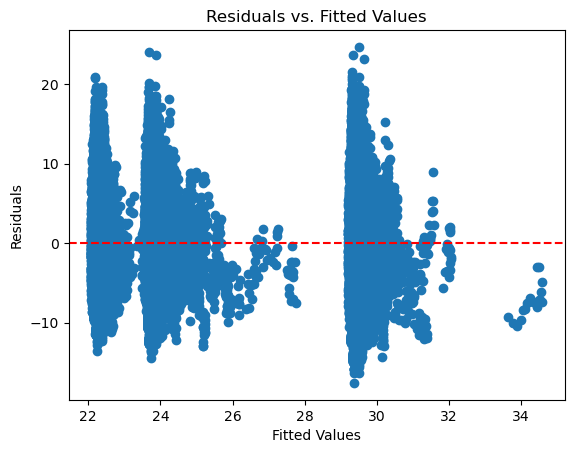

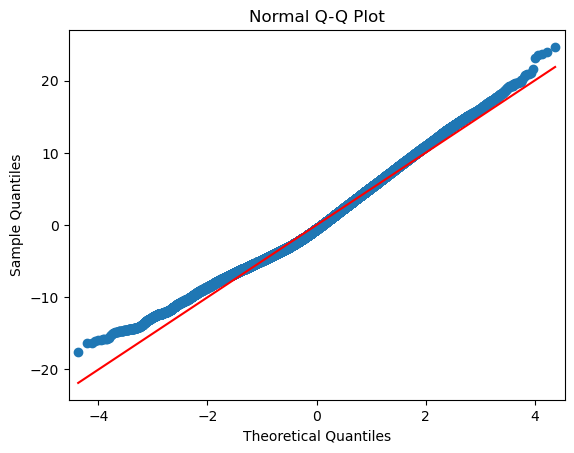

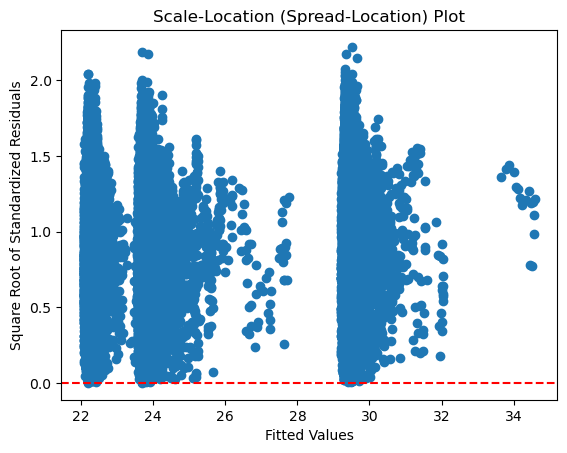

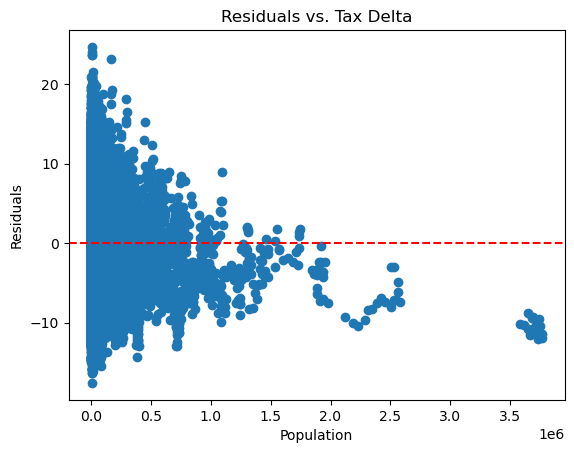

In [21]:
# Validating for linearity assumptions 

import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Assuming you have already fitted the linear regression model named 'model'

# Get fitted values and residuals
fitted_values = stats_model.fittedvalues
residuals = stats_model.resid

# 1. Residuals vs. Fitted Values Plot
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# 2. Normal Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q Plot')
plt.show()

# 3. Scale-Location (Spread-Location) Plot
sqrt_standardized_residuals = np.sqrt(np.abs(stats_model.get_influence().resid_studentized_internal))
plt.scatter(fitted_values, sqrt_standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Square Root of Standardized Residuals')
plt.title('Scale-Location (Spread-Location) Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# 4. Residuals vs. Predictor Plot for ''
plt.scatter(df_obese_age_pivot['Population'], residuals)
plt.xlabel('Population')
plt.ylabel('Residuals')
plt.title('Residuals vs. Tax Delta')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

##### Since the above model violates linearity assumptions, applying Box-Cox transoformation

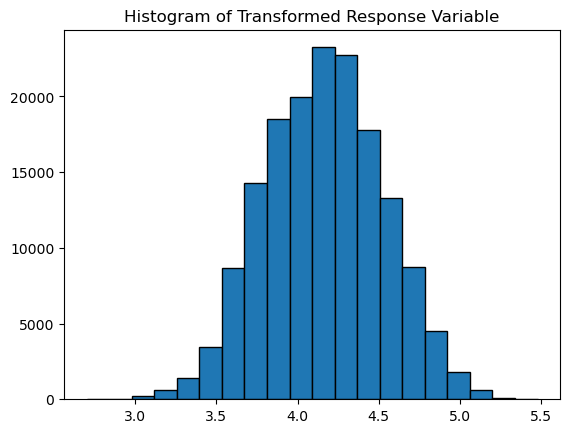

Lambda Value: 0.14805832959442175
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                 1.474e+04
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        07:46:06   Log-Likelihood:                -40185.
No. Observations:              159995   AIC:                         8.038e+04
Df Residuals:                  159990   BIC:                         8.043e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const       

In [22]:
# Applying the Box-Cox transformation

# Apply Box-Cox Transformation to Response Variable
y_transformed, lambda_value = stats.boxcox(y + 1)  # Adding 1 to handle zero values

# Visualize the Transformed Response Variable
plt.hist(y_transformed, bins=20, edgecolor='black')
plt.title('Histogram of Transformed Response Variable')
plt.show()

# Check Lambda Value
print(f'Lambda Value: {lambda_value}')

# Fit a new model using the transformed response variable
stats_model_transformed = sm.OLS(y_transformed, X).fit()

# Print the summary of the transformed model
print(stats_model_transformed.summary())

##### Conclusion:
The model with response as number of Obesity and predictor variable tax delta and control on age and population:
- The lambda value is 0.14. Indicating the new model fit is on (((% Obesity^0.14)-1)/0.14). We will call this response as transformed y. 
- One percent increase in tax delta, keeping all other constant, decreases the transformed y by 0.26
- One unit increase in  population, keeping all other constant, increases the transformed y by 1.388 x 10^-7. 
- All p-value are statistically significant
- Adjusted R-square is 0.269 indicating that the model can explain only 26.9% of variation in % Obesity
- Conditonal large number error can be fixed by scaling

In [23]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import pandas as pd

df_obese_scaled = df_obese_age_pivot.reset_index(drop=True)
df_obese_scaled

# Extract the independent variables (features) from your DataFrame
X = pd.get_dummies(df_obese_scaled[['tax_delta','Population', 'Age']], columns=['Age'], drop_first=True)
# Extract the dependent variable from your DataFrame
y = df_obese_scaled['Age Obesity Percentage']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the independent variables
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Add a constant term to the independent variables
X_scaled_df = sm.add_constant(X_scaled_df)

# Fit the linear regression model
model = sm.OLS(y, X_scaled_df).fit()

# Display the summary
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Age Obesity Percentage   R-squared:                       0.274
Model:                                OLS   Adj. R-squared:                  0.274
Method:                     Least Squares   F-statistic:                 1.512e+04
Date:                    Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                            07:46:07   Log-Likelihood:            -4.8499e+05
No. Observations:                  159995   AIC:                         9.700e+05
Df Residuals:                      159990   BIC:                         9.700e+05
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const 

##### Since the above model violates linearity assumptions, applying Box-Cox transformation to scaled parameters

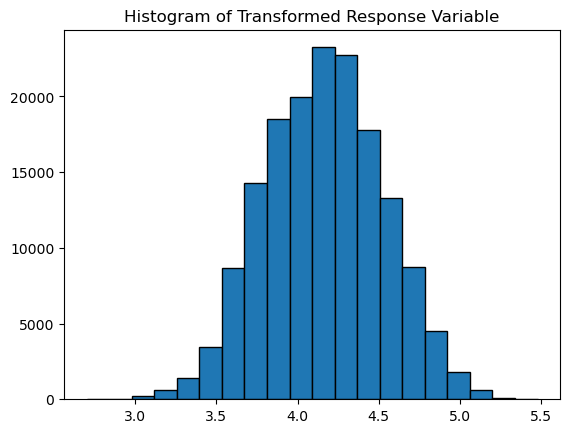

Lambda Value: 0.14805832959442175
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                 1.474e+04
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        07:46:07   Log-Likelihood:                -40185.
No. Observations:              159995   AIC:                         8.038e+04
Df Residuals:                  159990   BIC:                         8.043e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const       

In [24]:
# Applying the Box-Cox transformation

# Apply Box-Cox Transformation to Response Variable
y_transformed, lambda_value = stats.boxcox(y + 1)  # Adding 1 to handle zero values

# Visualize the Transformed Response Variable
plt.hist(y_transformed, bins=20, edgecolor='black')
plt.title('Histogram of Transformed Response Variable')
plt.show()

# Check Lambda Value
print(f'Lambda Value: {lambda_value}')

# Fit a new model using the transformed response variable
stats_model_transformed = sm.OLS(y_transformed, X_scaled_df).fit()

# Print the summary of the transformed model
print(stats_model_transformed.summary())

##### Conclusion:
The model with response as number of Obesity and predictor variable tax delta and control on age and population:
- The lambda value is 0.14. Indicating the new model fit is on (((% Obesity^0.14)-1)/0.14). We will call this response as transformed y. 
- One percent increase in scaled tax delta, keeping all other constant, decreases the transformed y by 0.0067
- One unit increase in scaled population, keeping all other constant, increases the transformed y by 0.0118. 
- All p-value are statistically significant
- Adjusted R-square is 0.269 indicating that the model can explain only 26.9% of variation in % Obesity

### Final Conclusion:
- The best model for Obesity % variation with Tax Delta, after accounting for necessary controls and corrections of assumptions, is the model with response, (((% Obesity^0.14)-1)/0.14); and scaled predictor grocery tax, restaurant tax, population and age control
- This model explains for 26.9% variability in Obesity %

### Study Conslusion:
- We choose model with percentage Obesity as response is over absolute Obesity even though the Adj R square value is more or less same in both.
- The model with percentage Obesity has similar Adj R square when 
a. The model with tax is fitted with controls on age and population
b. The model with tax delta is fitted with controls on age and population
- The model with tax delta is more relevant to our study as we want to see the impact of relative changes in restaurant and grocery tax on health viz a viz Obesity %
- This model has moderate Adj R square and has predictors as scaled tax delta, scaled age and scaled population and response as transformed Obesity % i.e. (((% Obesity^0.14)-1)/0.14)
- This model explains the following in our study:
"One percent increase in tax delta, keeping all other constant (i.e. age, population), decreases the transformed y by 0.14"
i.e. as Tax Delta increases the Obesity % decreases (not linearly though). In other words, if restaurant tax is increased and grocery tax is decreased then resultant tax delta increases and hence Obesity % decreases, keeping all others constant and this change is not linear in nature.
